In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.columns)

C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

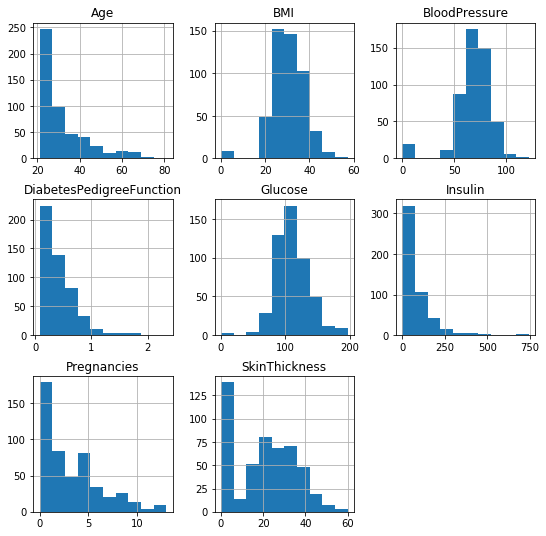

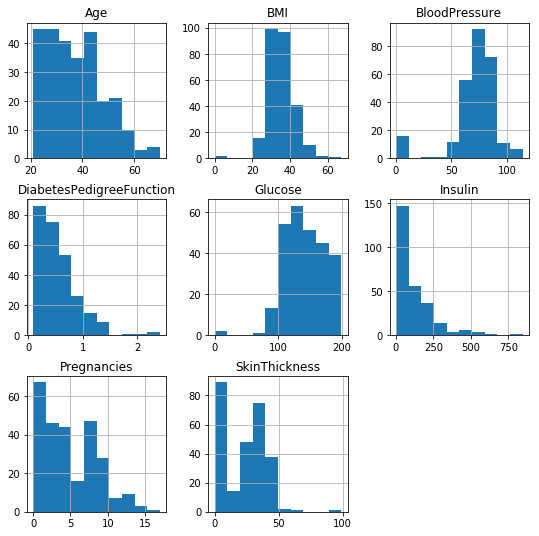

In [6]:
diabetes.groupby('Outcome').hist(figsize=(9, 9))

In [7]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes[feature_names]
y = diabetes.Outcome


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs',random_state=0)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT',DecisionTreeClassifier()))


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes.Outcome, random_state=0)


In [12]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.755208
1  SVC  0.765625
2   LR  0.781250
3   DT  0.750000
4  GNB  0.765625
5   RF  0.796875
6   DT  0.755208


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


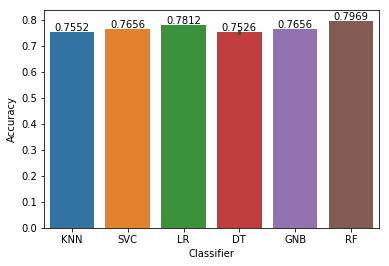

In [13]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 

Mean Square Error :  0.24479166666666666


In [15]:
from sklearn.metrics import confusion_matrix
#from mlxtend.plotting import plot_decision_regions

In [18]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[101  24]
 [ 23  44]]


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       125
           1       0.65      0.66      0.65        67

   micro avg       0.76      0.76      0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



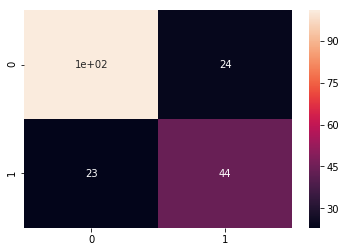

In [20]:
import seaborn as sn
sn.heatmap(matrix, annot=True)
plt.show()